<a href="https://colab.research.google.com/github/sfonte23/Federal_Piaui/blob/main/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 💁‍♂ Sobre o Dataframe
Informações que podem ser úteis para sua compreensão


## [Download](https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset?resource=download)

**Features:**

**Age**: Integer values representing the patient's age, ranging from 20 to 80.

**Gender**: Binary values representing gender, where 0 indicates Male and 1 indicates Female.

**BMI**: Continuous values representing Body Mass Index, ranging from 15 to 40.

**Smoking**: Binary values indicating smoking status, where 0 means No and 1 means Yes.

**GeneticRisk**: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

**PhysicalActivity**: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

**AlcoholIntake**: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

**CancerHistory**: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

**Diagnosis**: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

---
# 📦 Importações, Instalações e Funções




## Importações

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Any
from google.colab import drive

# Treino e Seleção
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Métricas de Classificação, Matriz de Confusão e Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Árvore
from sklearn.tree import DecisionTreeClassifier

# Floresta Aleatória
from sklearn.ensemble import RandomForestClassifier

# Regressão Logística
from sklearn.linear_model import LogisticRegression

## Funções

In [6]:
def evaluate_model(y_true: list[Any], y_pred: list[Any], model_name: str) -> None:
    """
    Exibe métricas de avaliação para um modelo de classificação.

    Parâmetros:
    ----------
    y_true : list
        Lista ou array com os rótulos reais das classes.
    y_pred : list
        Lista ou array com os rótulos previstos pelo modelo.
    model_name : str
        Nome do modelo a ser exibido no relatório.

    Retorna:
    -------
    None
        A função apenas imprime os resultados no console.
    """
    print(f'\nDesempenho do modelo: {model_name}')
    print('Acurácia:', accuracy_score(y_true, y_pred))
    print('Matriz de Confusão:\n', confusion_matrix(y_true, y_pred))
    print('Relatório de Classificação:\n', classification_report(y_true, y_pred))

## Acessar Drive

In [3]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4º Período/ML1/Trabalho Final/The_Cancer_data_1500_V2.csv'
df_cancer = pd.read_csv(file_path)

Mounted at /content/drive


---
#🕵 Explorando os Dados
Nessa seção vamos:
1. Coletar e demonstrar dados do dataset escolhido
2. Realizar todos os procedimentos cabíveis de pre-processamento dos dados
3. Identificar e demonstrar outliers nos dados

In [8]:
df = df_cancer.copy()

## Exploração Básica
Entender os dados que estamos trabalhando!

In [9]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [10]:
df.info()

# Comentários sobre cada coluna:
# 0 - Age: Idade do paciente (inteiro), variando entre 20 e 80 anos.
# 1 - Gender: Gênero do paciente (0 = Masculino, 1 = Feminino).
# 2 - BMI: Índice de Massa Corporal (contínuo), variando entre 15 e 40.
# 3 - Smoking: Indica se o paciente é fumante (0 = Não, 1 = Sim).
# 4 - GeneticRisk: Nível de risco genético para câncer (0 = Baixo, 1 = Médio, 2 = Alto).
# 5 - PhysicalActivity: Horas semanais de atividade física (contínuo), variando de 0 a 10.
# 6 - AlcoholIntake: Unidades de álcool consumidas por semana (contínuo), de 0 a 5.
# 7 - CancerHistory: Histórico pessoal de câncer (0 = Não, 1 = Sim).
# 8 - Diagnosis: Diagnóstico atual de câncer (0 = Sem câncer, 1 = Com câncer).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [12]:
df.describe()

# Comentários:
# count: Número de registros não nulos em cada coluna (deve ser 1500 para todas, pois não há valores ausentes).
# mean: Média dos valores para cada coluna numérica.
# std: Desvio padrão, indicando a variabilidade dos dados.
# min: Valor mínimo observado em cada coluna.
# 25%: Primeiro quartil, valor abaixo do qual estão 25% dos dados.
# 50%: Mediana, valor central que divide os dados em duas metades.
# 75%: Terceiro quartil, valor abaixo do qual estão 75% dos dados.
# max: Valor máximo observado em cada coluna.

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


## Exploração de Frequências
Entender como é essa população

In [ ]:
# Distribuição percentual da variável alvo
df['Diagnosis'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
Diagnosis,
0,62.87%
1,37.13%


In [ ]:
# Distribuição percentual de Gênero
df['Gender'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
Gender,
0,50.93%
1,49.07%


In [ ]:
# Distribuição percentual de Histórico de Câncer
df['CancerHistory'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
CancerHistory,
0,85.60%
1,14.40%


In [ ]:
# Distribuição percentual de Tabagismo
df['Smoking'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
Smoking,
0,73.07%
1,26.93%


In [ ]:
# Distribuição percentual de Risco Genético
df['GeneticRisk'].value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
GeneticRisk,
0,59.67%
1,29.80%
2,10.53%


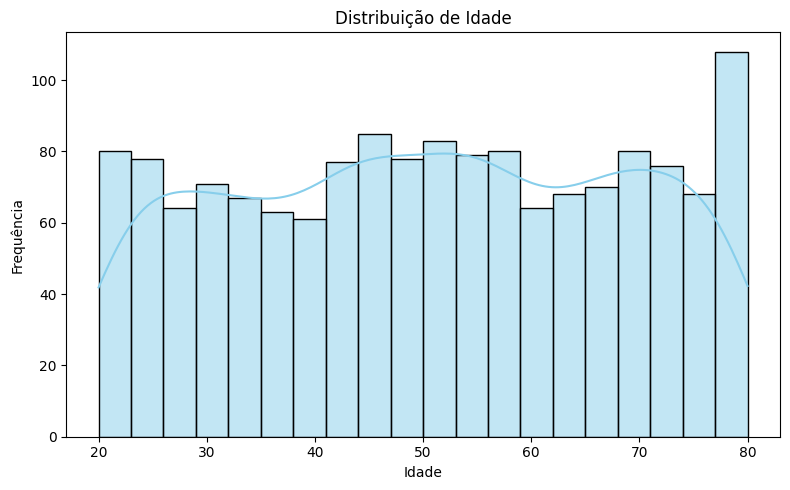

In [ ]:
# Distribuição das Idades
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(False)
plt.tight_layout()
plt.show()

## Exploração de Correlações
Entender basicamente se há e o pode influenciar o diagnóstico

In [13]:
# Calcular correlação entre todas as variáveis numéricas e a variável alvo 'Diagnosis'
# A correlação indica o grau e a direção da relação linear entre as variáveis
# Valores próximos de 1 indicam forte correlação positiva
# Valores próximos de -1 indicam forte correlação negativa
# Valores próximos de 0 indicam pouca ou nenhuma correlação linear

correlacoes = df.corr(numeric_only=True)['Diagnosis'].sort_values(ascending=False)

# Exibe as correlações ordenadas da maior para a menor em relação à variável 'Diagnosis'
correlacoes

,Diagnosis
Diagnosis,1.000000
CancerHistory,0.392188
GeneticRisk,0.253472
Gender,0.250336
Smoking,0.226999
AlcoholIntake,0.212772
Age,0.196603
BMI,0.187560
PhysicalActivity,-0.150089


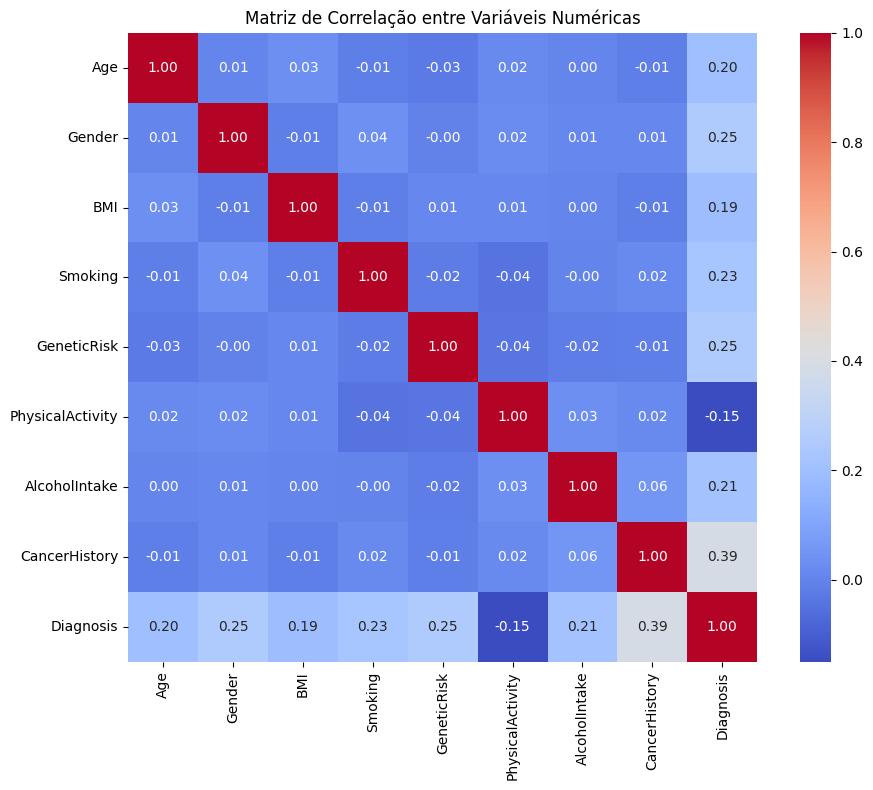

In [ ]:
# Matriz Completa
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

## Pré-processamento dos Dados

### Verifica Nulos

In [ ]:
df.isnull().sum()

# Se houvesse valores ausentes, imputaria média ou removeria, dependeria do caso
# df.fillna(df.mean(), inplace=True)  # Exemplo de imputação com média (se for numérica)
# df.dropna(inplace=True)  # Exemplo de remoção

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


### Identificar Outliers

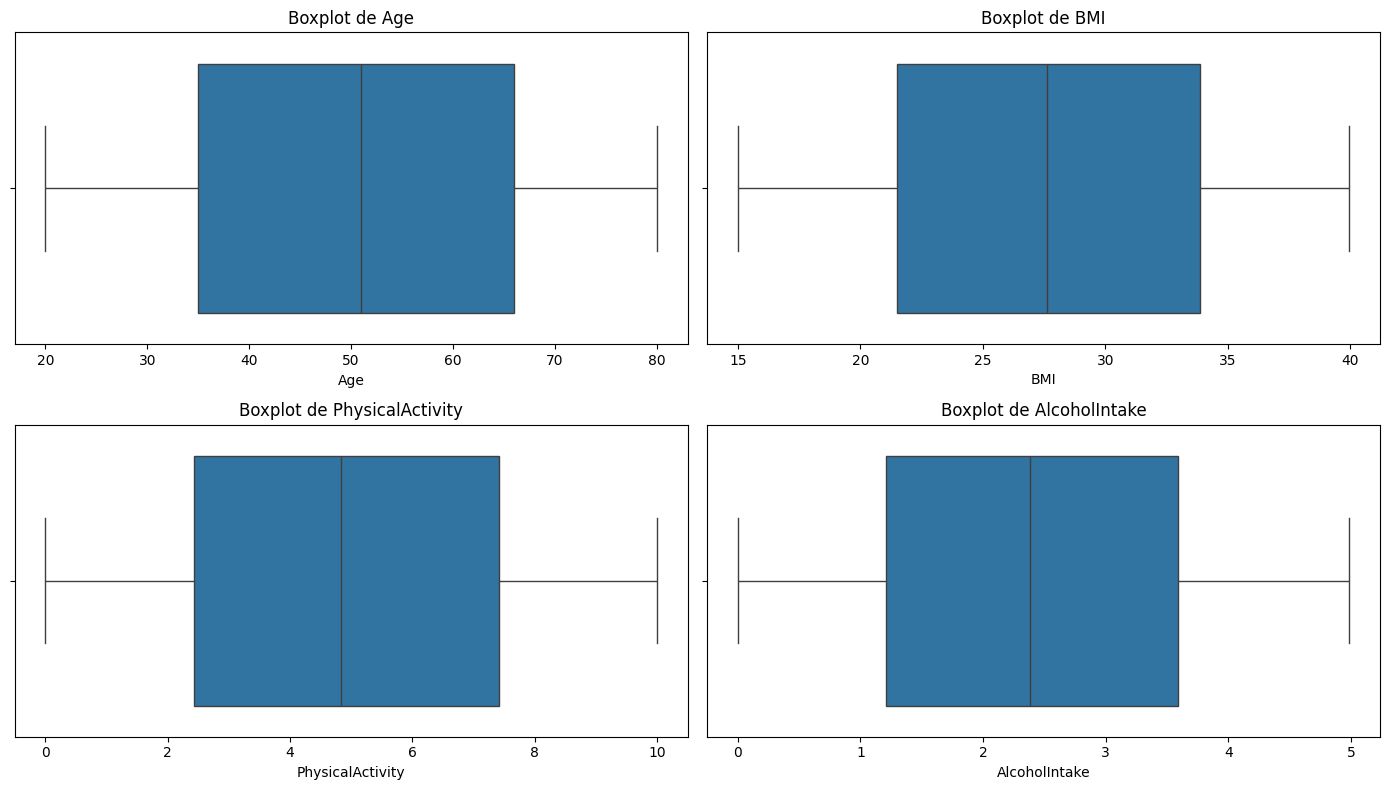

In [ ]:
# Definir variáveis contínuas
variaveis_continuas = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

# Configuração para o gráfico
plt.figure(figsize=(14, 8))

# Gerar boxplots para cada variável contínua
for i, variavel in enumerate(variaveis_continuas, 1):
    plt.subplot(2, 2, i)  # Organiza os gráficos em uma grid 2x2
    sns.boxplot(x=df[variavel])
    plt.title(f'Boxplot de {variavel}')
    plt.tight_layout()

plt.show()

In [ ]:
df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


### Converter Variáveis Categóricas em Numéricas

In [ ]:
# Esse dataset vem bem limpinho, não temos variáveis categóricas não numéricas
# Vou deixar por aqui para não esquecer de usar para outros datasets

---
# 🦾 Hands-ON com ML!
Nessa seção vamos:

1. Primeiros testes com o modelo de ML escolhido
2. Próximos passos para conclusão
3. Avaliação pré-eliminar


## Pré-Processamento

Divisão de treinamento e teste, selecionando as colunas categóricas

In [93]:
# Isso transforma variáveis categóricas em variáveis binárias (0 ou 1) para uso em modelos de ML
# 'drop_first=True' evita multicolinearidade removendo a primeira categoria de cada variável
categorical_cols = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory']
numeric_cols = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

# Codificar variáveis categóricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [94]:
# Separar variáveis independentes (features) da variável dependente (target)
# 'X' contém todas as colunas exceto 'Diagnosis', que é o alvo
X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded['Diagnosis']

In [95]:
# Dividir os dados em conjuntos de treino e teste
# 80% dos dados serão usados para treino e 20% para teste
# 'random_state=42' garante reprodutibilidade da divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Aplicar padronização somente às colunas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # mantém o restante das colunas (one-hot) intactas
)

In [97]:
# Padronizar (normalizar) as variáveis numéricas para que todas tenham média 0 e desvio padrão 1
# Isso melhora o desempenho e a convergência de muitos algoritmos de ML
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

## Comportamento dos Modelos com Treino e Teste

### Naive Bayes - 79,67%

In [98]:
# Criar o classificador Naive Bayes
nb = GaussianNB()

# Treinar com os dados padronizados de treino
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [99]:
# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test_scaled)
y_pred

# Avaliar o modelo
print('Acurácia:', round(accuracy_score(y_test, y_pred),4))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred))

Acurácia: 0.7967
Matriz de Confusão:
 [[171  13]
 [ 48  68]]


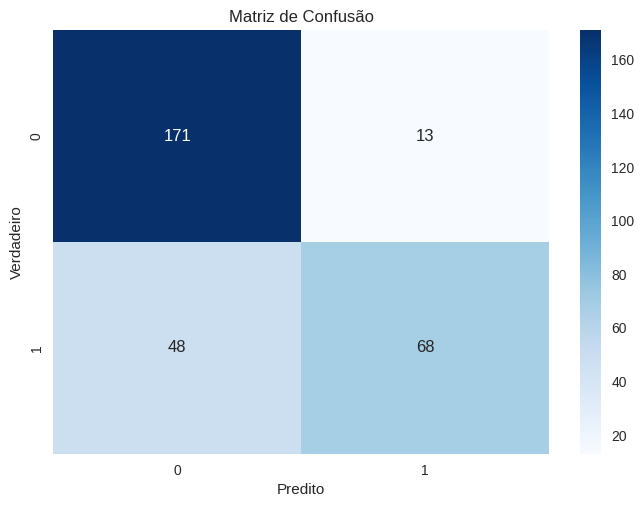

In [100]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
# O eixo x representa os valores preditos pelo modelo, ou seja, as classes que o modelo classificou para cada amostra, com os mesmos significados:
# 0 indica que o modelo previu "Sem Câncer"
# 1 indica que o modelo previu "Com Câncer"

plt.ylabel('Verdadeiro')
# O eixo y representa os valores verdadeiros (rótulos reais) da variável alvo (Diagnosis), onde:
# 0 significa "Sem Câncer" (classe negativa)
# 1 significa "Com Câncer" (classe positiva)

plt.title('Matriz de Confusão')
plt.show()

In [101]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       184
           1       0.84      0.59      0.69       116

    accuracy                           0.80       300
   macro avg       0.81      0.76      0.77       300
weighted avg       0.80      0.80      0.79       300



### Árvore de Decisão - 88%

In [102]:
# Criar o classificador de Árvore de Decisão
dt = DecisionTreeClassifier(random_state=42)

# Treinar com os dados padronizados de treino
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [103]:
# Fazer previsões
y_pred_dt = dt.predict(X_test_scaled)

# Avaliar o modelo
print('Acurácia:', round(accuracy_score(y_test, y_pred_dt), 4))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred_dt))

Acurácia: 0.88
Matriz de Confusão:
 [[169  15]
 [ 21  95]]


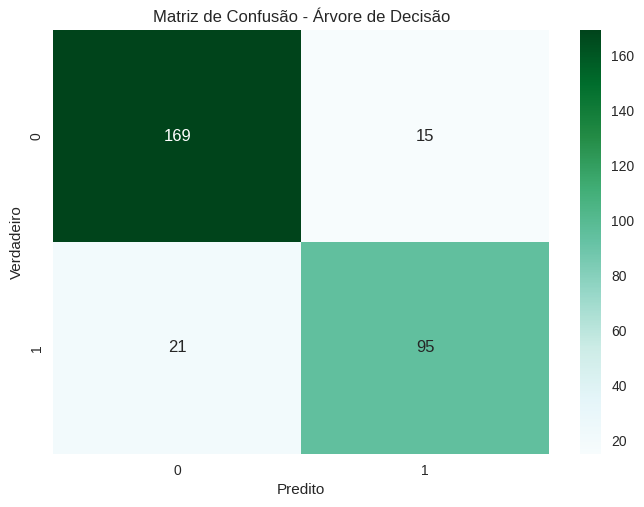

In [104]:
# Visualizar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

In [105]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_dt))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       184
           1       0.86      0.82      0.84       116

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



### Random Forest - 92%

In [106]:
# Criar o classificador Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores, seed 42 para reprodutibilidade

# Treinar o modelo com os dados de treino
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [107]:
# Fazer previsões no conjunto de teste
y_pred_rf = rf.predict(X_test_scaled)

# Avaliar o desempenho
print('Acurácia:', round(accuracy_score(y_test, y_pred_rf), 6))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred_rf))

Acurácia: 0.92
Matriz de Confusão:
 [[174  10]
 [ 14 102]]


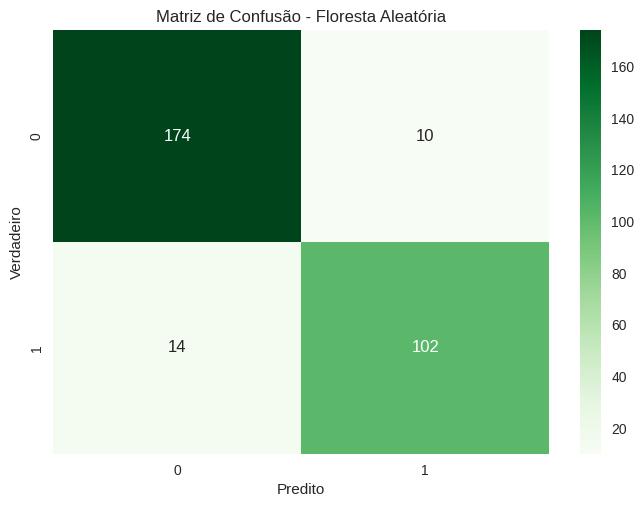

In [108]:
# Visualizar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Floresta Aleatória')
plt.show()

In [109]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_rf))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       184
           1       0.91      0.88      0.89       116

    accuracy                           0.92       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.92      0.92      0.92       300



### Regressão Logística - 90,67%

In [110]:
# Criar o modelo
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Treinar com dados padronizados
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [111]:
# Fazer previsões
y_pred_logreg = logreg.predict(X_test_scaled)

# Avaliar o modelo
print('Acurácia:', round(accuracy_score(y_test, y_pred_logreg), 4))
print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred_logreg))

Acurácia: 0.9067
Matriz de Confusão:
 [[175   9]
 [ 19  97]]


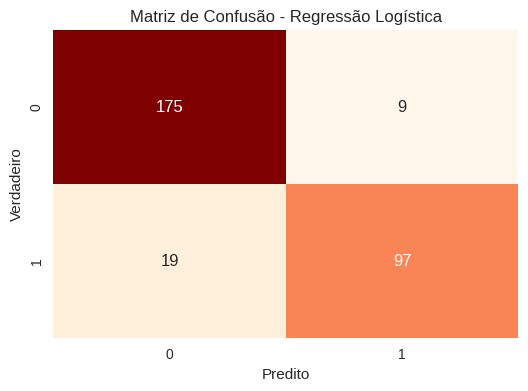

In [112]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred_logreg)

# Plotar a matriz de confusão com seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='OrRd', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [113]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_logreg))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       184
           1       0.92      0.84      0.87       116

    accuracy                           0.91       300
   macro avg       0.91      0.89      0.90       300
weighted avg       0.91      0.91      0.91       300



---
# ✅ Conclusões Pré-eliminares

## Naive Bayes

O modelo Naive Bayes apresentou um desempenho sólido com 80% de acurácia na classificação do diagnóstico de câncer, mostrando alta precisão e recall para a classe negativa (sem câncer), o que indica que identifica bem os pacientes saudáveis e gera poucos falsos positivos. Contudo, para a classe positiva (com câncer), embora a precisão seja alta, o recall é significativamente menor, indicando que uma parcela considerável dos casos reais de câncer não foi detectada, o que pode ser crítico em contextos médicos. Esse comportamento sugere que o modelo é mais conservador e prioriza a redução de falsos positivos, mas às custas de uma menor sensibilidade para identificar todos os casos de câncer, apontando para a necessidade de ajustes futuros para melhorar a detecção de casos positivos e minimizar riscos clínicos.

## Árvore de Decisão

O modelo de Árvore de Decisão apresentou um desempenho bastante sólido na classificação, alcançando uma acurácia geral de 88%. A classe 0 obteve uma precision de 0.89 e recall de 0.92, indicando que a maioria dos exemplos dessa classe foram corretamente identificados. Já a classe 1 teve uma precision de 0.86 e recall de 0.82, demonstrando também boa capacidade de detecção, embora com um leve número maior de falsos negativos. O equilíbrio entre os valores de precision, recall e f1-score para ambas as classes mostra que o modelo conseguiu aprender bem os padrões dos dados e generalizar para o conjunto de teste, superando o desempenho anterior do Naive Bayes.

## Floresta Aleatória

O modelo de Random Forest apresentou um excelente desempenho na classificação dos dados, alcançando uma acurácia de 92%. A classe 0 obteve precision de 93% e recall de 95%, indicando que a maioria dos negativos foi corretamente identificada e raramente confundida com a classe oposta. Já a classe 1 também teve um desempenho muito bom, com precision de 91% e recall de 88%, o que mostra que o modelo conseguiu identificar a maior parte dos casos positivos com poucos falsos positivos. O f1-score — que representa o equilíbrio entre precisão e sensibilidade — foi de 0.94 para a classe 0 e 0.89 para a classe 1, confirmando a robustez geral do modelo. As médias macro e ponderada reforçam esse equilíbrio, ambas em torno de 0.92, o que sugere que o modelo trata bem ambas as classes, mesmo com possíveis desequilíbrios de quantidade. Esse desempenho faz da Random Forest uma opção superior em relação aos modelos anteriores testados.

## Regressão Logística

Esse relatório mostra que o modelo de regressão logística tem um desempenho muito bom para o problema. A acurácia geral é 91%, indicando que 91% das previsões estão corretas. A classe 0 (sem câncer) teve uma precisão alta (90%) e um recall excelente (95%), ou seja, o modelo erra pouco ao prever negativos e consegue identificar a maioria dos verdadeiros negativos. Para a classe 1 (com câncer), a precisão foi ainda um pouco maior (92%), mas o recall foi menor (84%), o que significa que o modelo perde alguns casos positivos (falsos negativos). O F1-score balanceia essas métricas e mostra que o desempenho geral é sólido, com um bom equilíbrio entre precisão e recall. Em resumo, o modelo está bem ajustado, com ligeira tendência a errar mais nos positivos, o que pode ser relevante dependendo do custo de falsos negativos para o problema em questão